Собственные зачения и собственные функции для осциляторного потенциала

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from math import e, sqrt, factorial, pi, floor
from functools import cache
from scipy.integrate import quad

In [31]:
h = 6.62607015e-34 # Дж * с
h_bar = h / (2*pi)
m = 9.109e-31    
omega = 1e16
a = 8e-10
x_min = -a
x_max = a
N = 1000

In [32]:
def psi(x, n):
    return 1 / sqrt(2**n * factorial(n)) * \
        (m * omega / (pi * h_bar))**(1/4) * \
        e**(-(m * omega * x**2) / (2*h_bar)) \
        * hermite(n, sqrt(m*omega/h_bar)*x)

@cache
def hermite(n, x):
    res = 0
    for j in range(floor(n/2) + 1):
        res += (-1)**j * factorial(n) * (2*x)**(n-2*j) / (factorial(j) * factorial(n - 2*j))
    return res

def E(n):
    return h_bar*omega*(n + 1/2)

E0 = 5.272859088230782e-19
E1 = 1.5818577264692347e-18
E2 = 2.636429544115391e-18
E3 = 3.691001361761547e-18


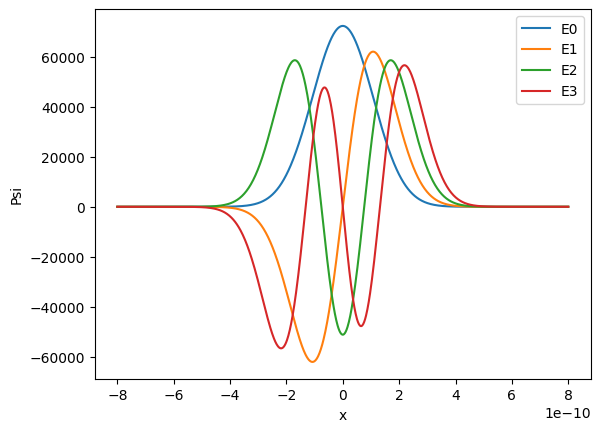

In [33]:
xs = np.linspace(x_min, x_max, N)
dx = xs[1] - xs[0]
legend = []
for n in range(4):
    print(f'E{n} = {E(n)}')
    ys = np.array([psi(x, n) for x in xs])
    plt.plot(xs, ys, label='n={}'.format(n))
    legend.append(f'E{n}')
    plt.xlabel('x')
    plt.ylabel('Psi')

plt.legend(legend)
plt.show()